In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy as sp

## Data Collection

In [2]:
application_data = pd.read_csv(r"C:\Users\samba\Downloads\application_data.csv")

In [3]:
previous_application_data = pd.read_csv(r"C:\Users\samba\Downloads\Telegram Desktop\previous_application.csv")

## Data Transformation

In [4]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Here So many (122) Columns is there. Some columns not valid for our analysis so i want to drop some of columns So I use correlation between Variables
## Method = 'Pearson'

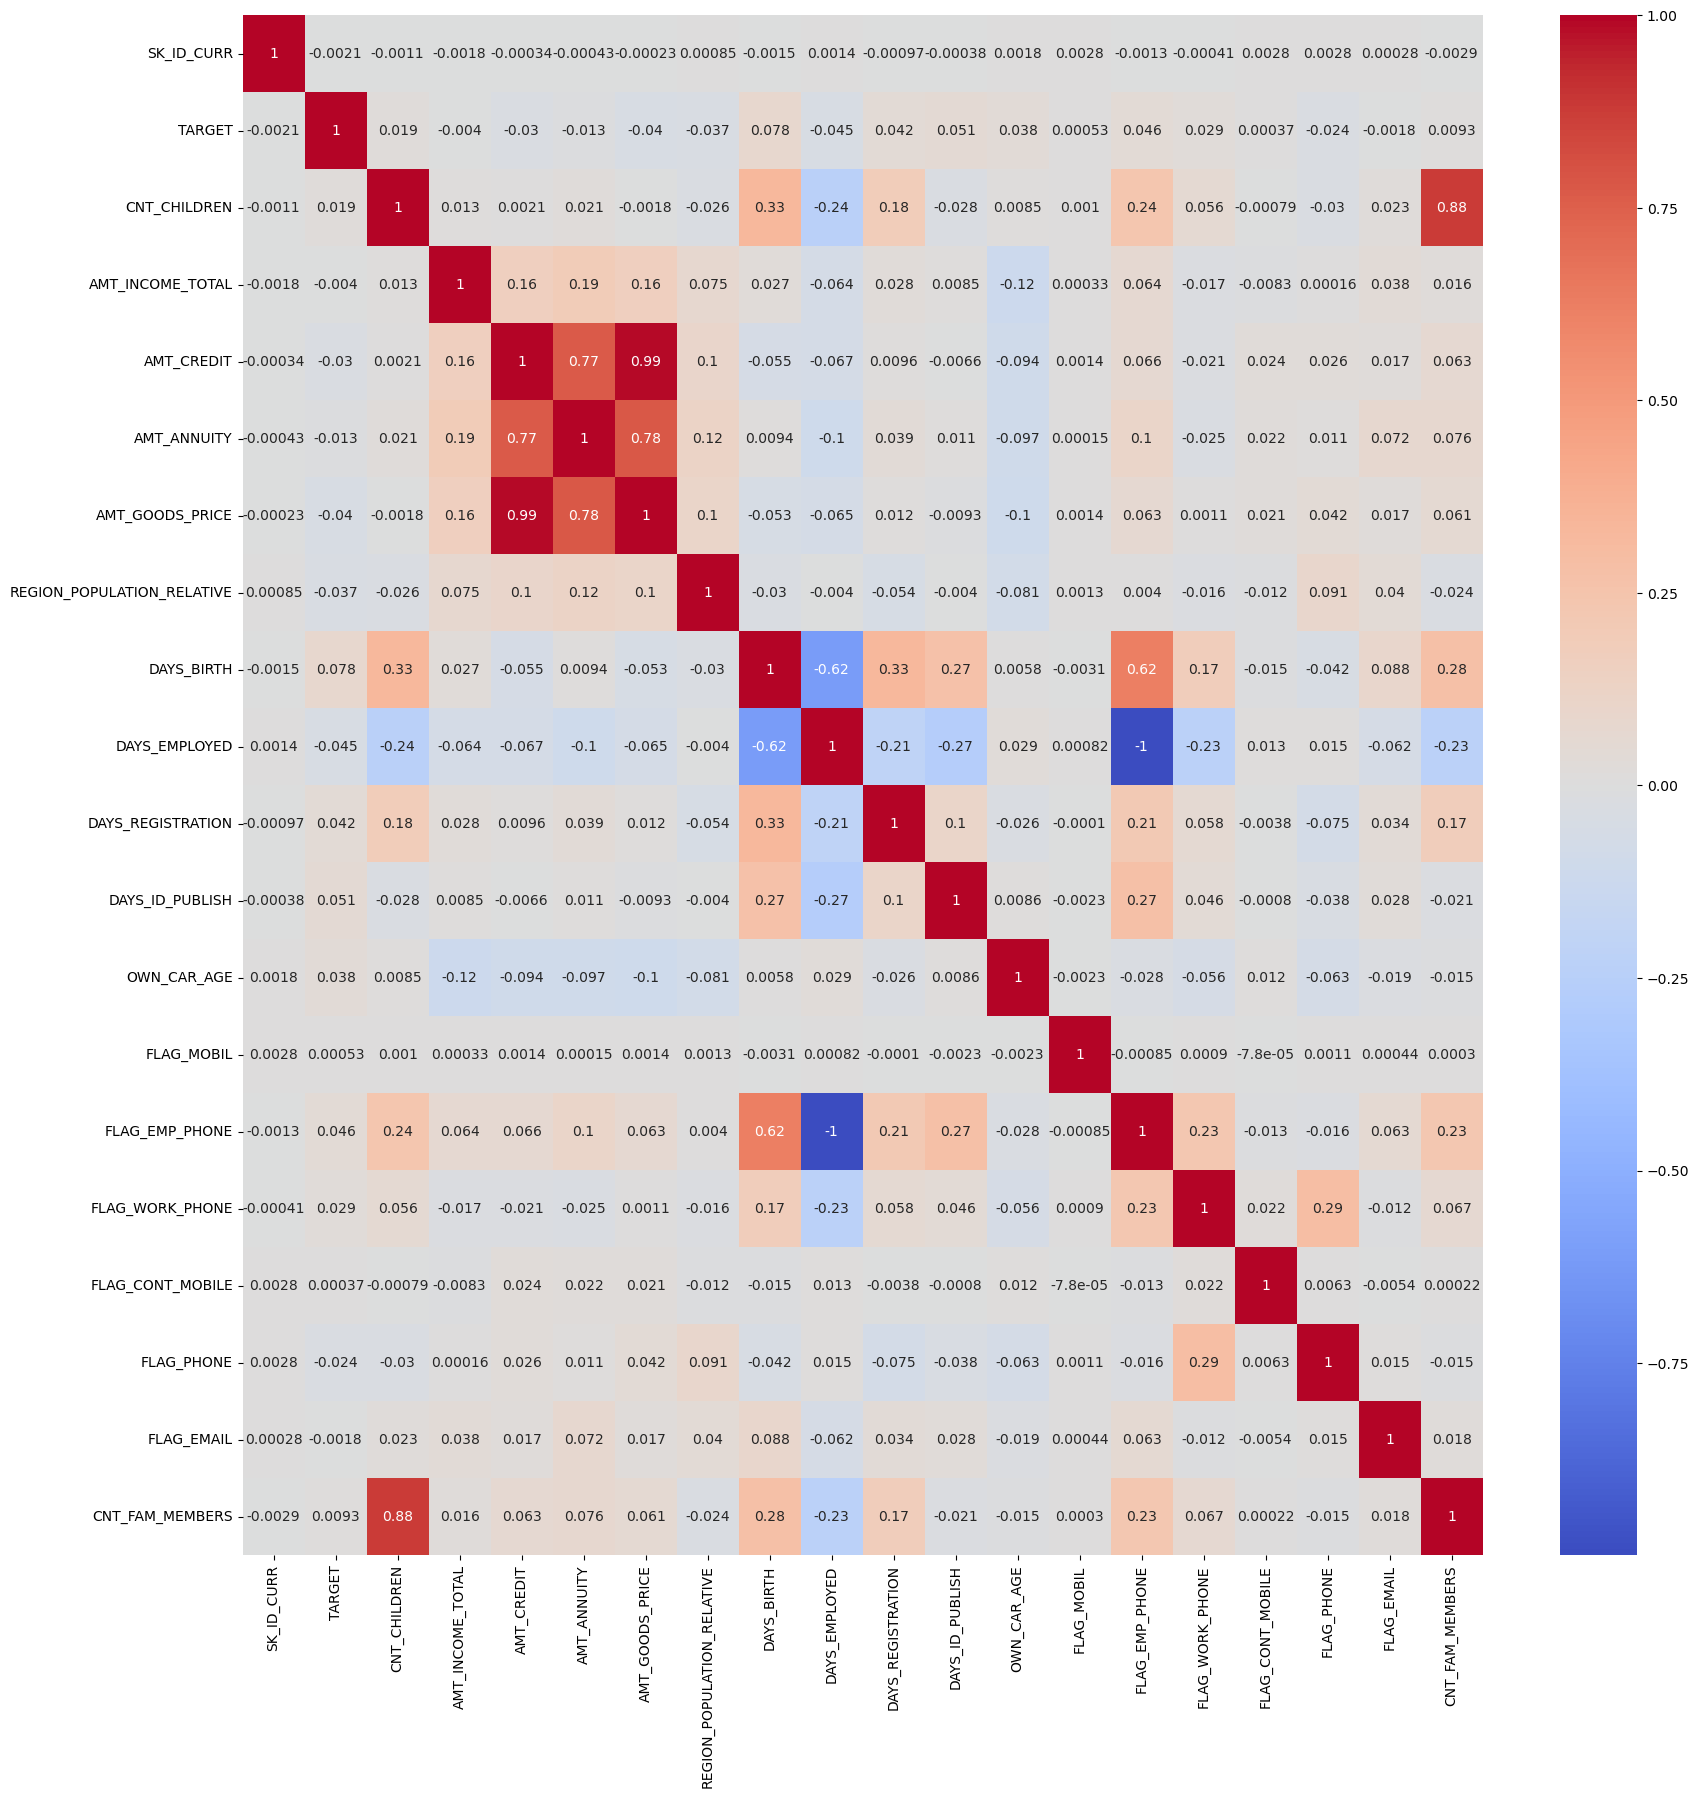

In [5]:
plt.figure(figsize = (20,20))
sns.heatmap(application_data.iloc[:,:30].corr(method = 'pearson'),cmap = 'coolwarm',annot = True)
plt.show()

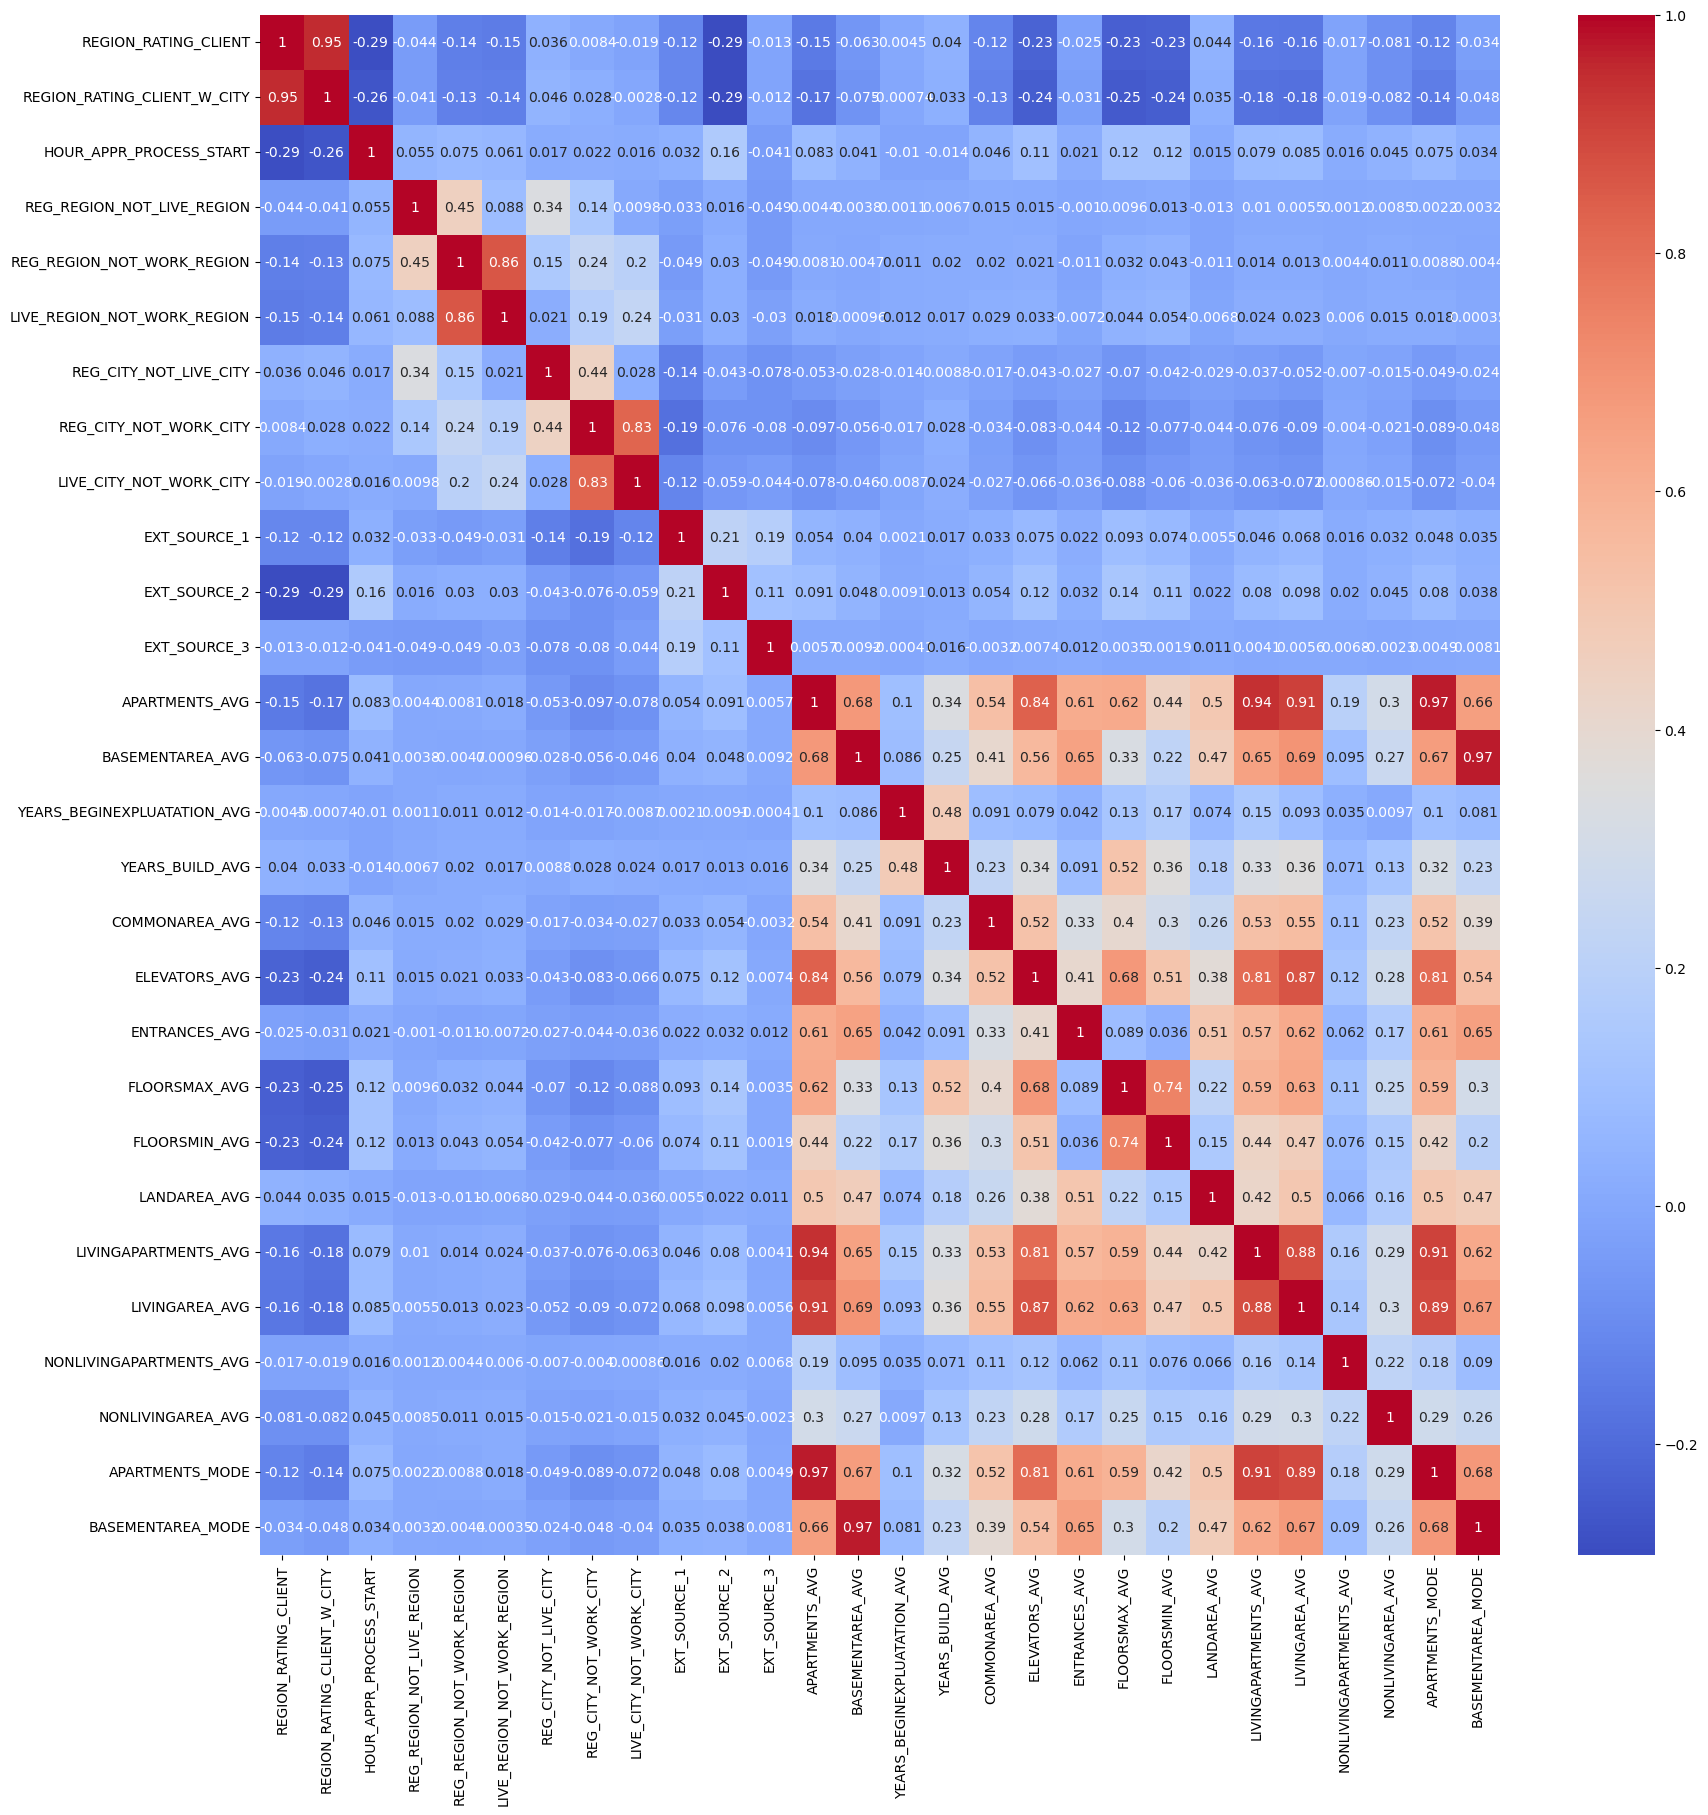

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(application_data.iloc[:,30:60].corr(),cmap = 'coolwarm',annot = True)
plt.show()

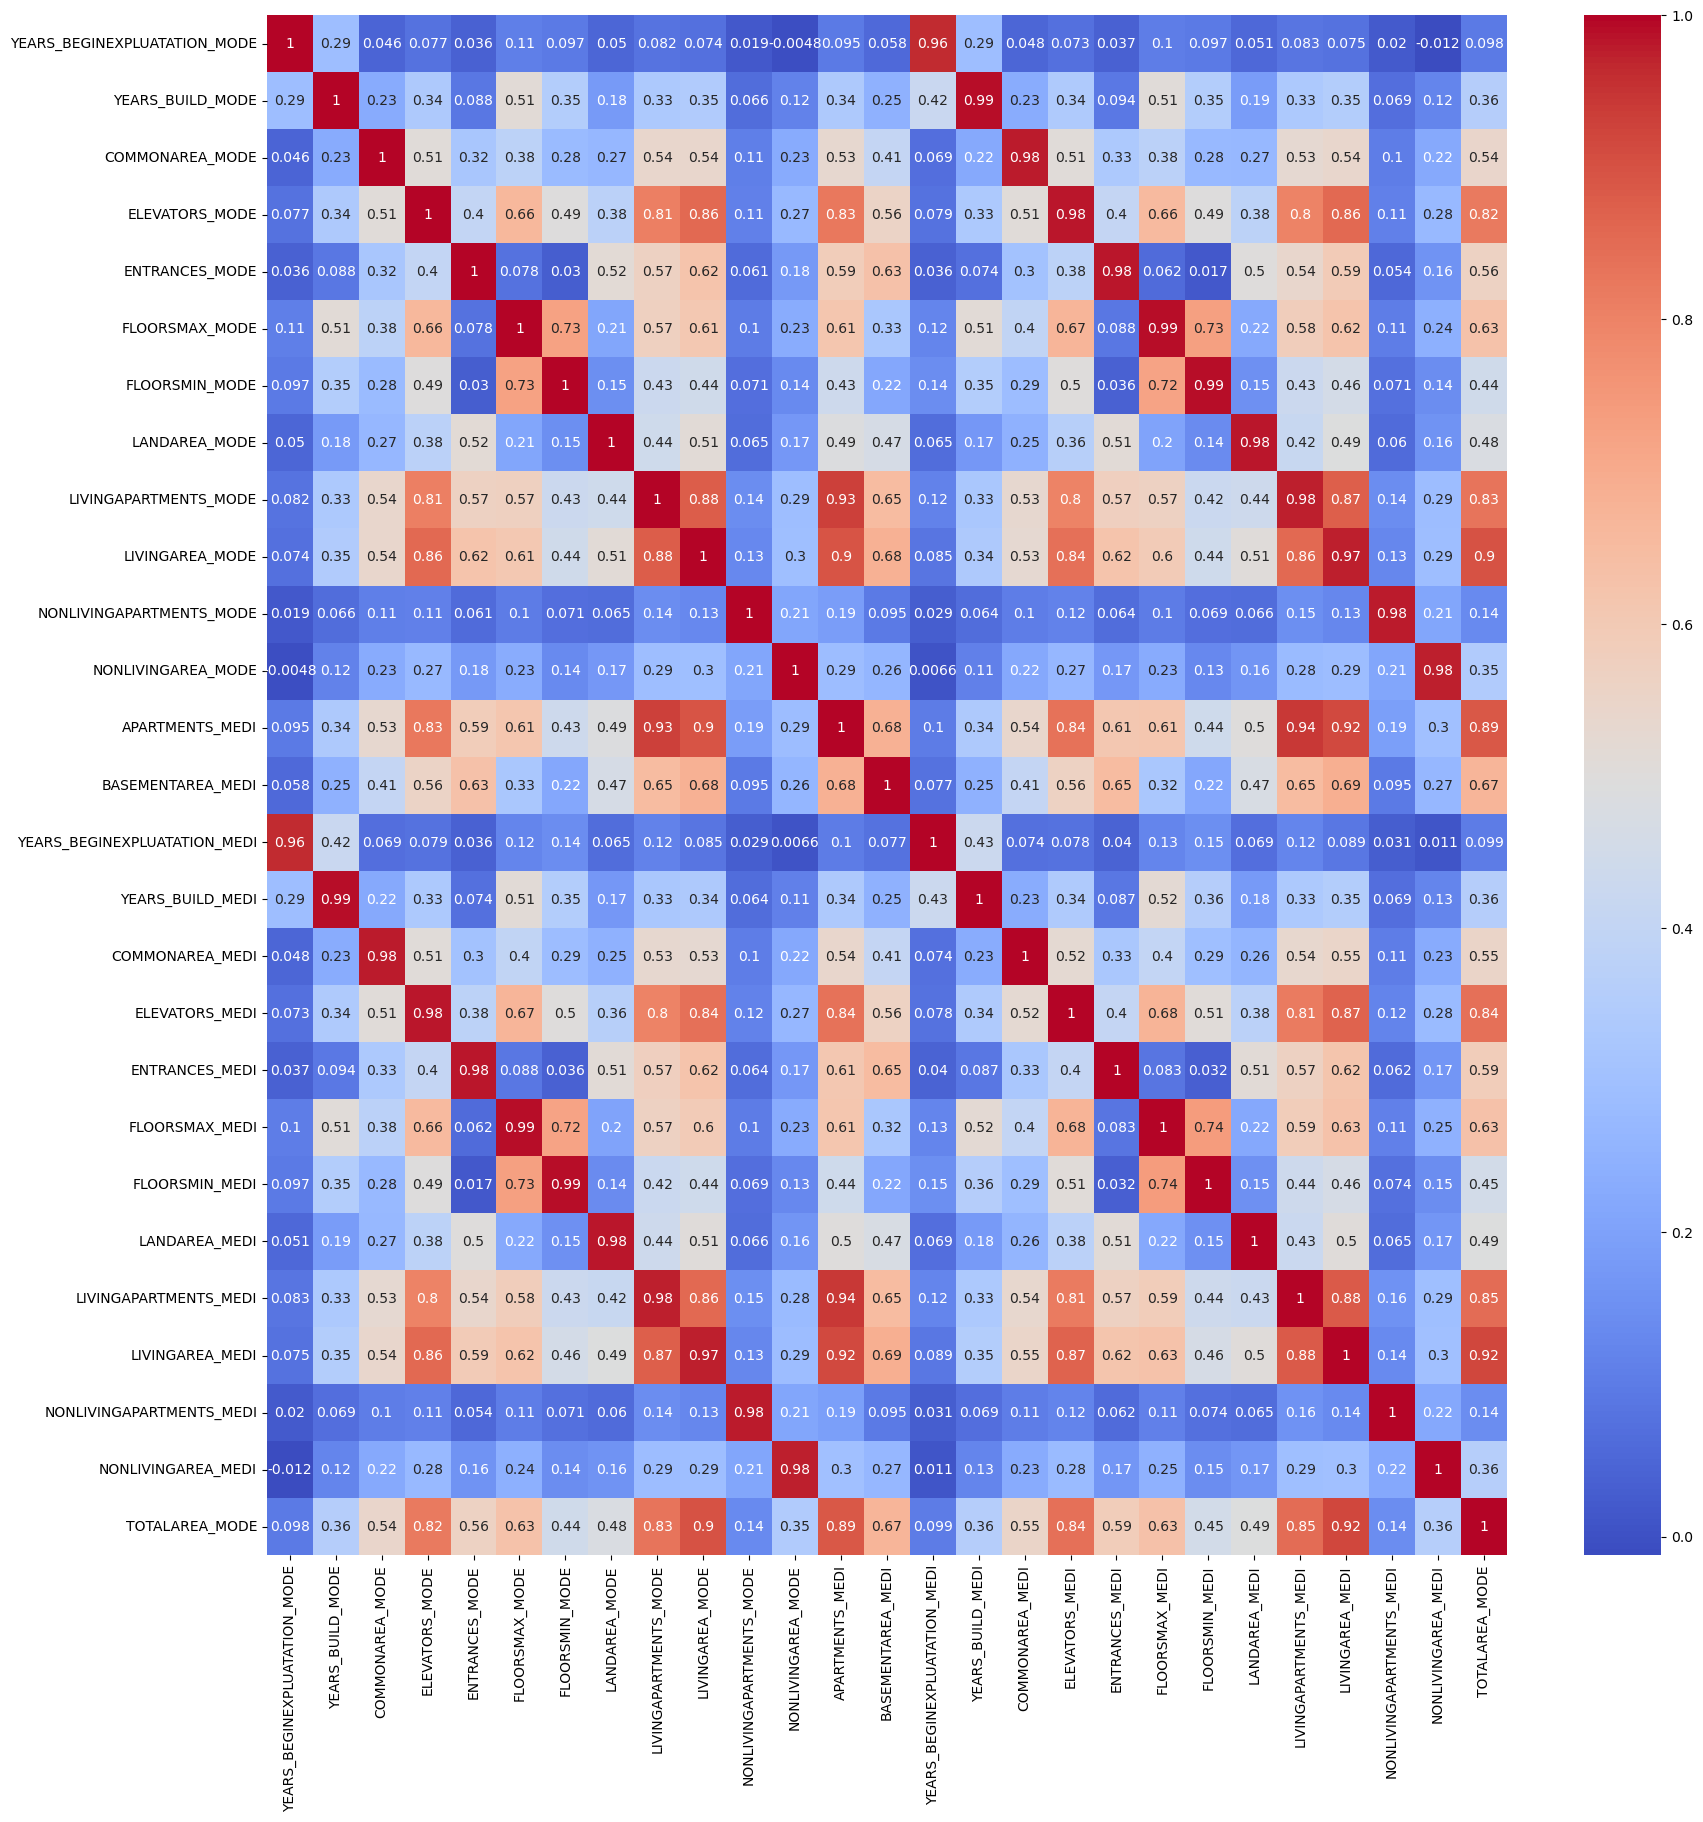

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(application_data.iloc[:,60:90].corr(method = 'pearson'),cmap = 'coolwarm',annot = True)
plt.show()

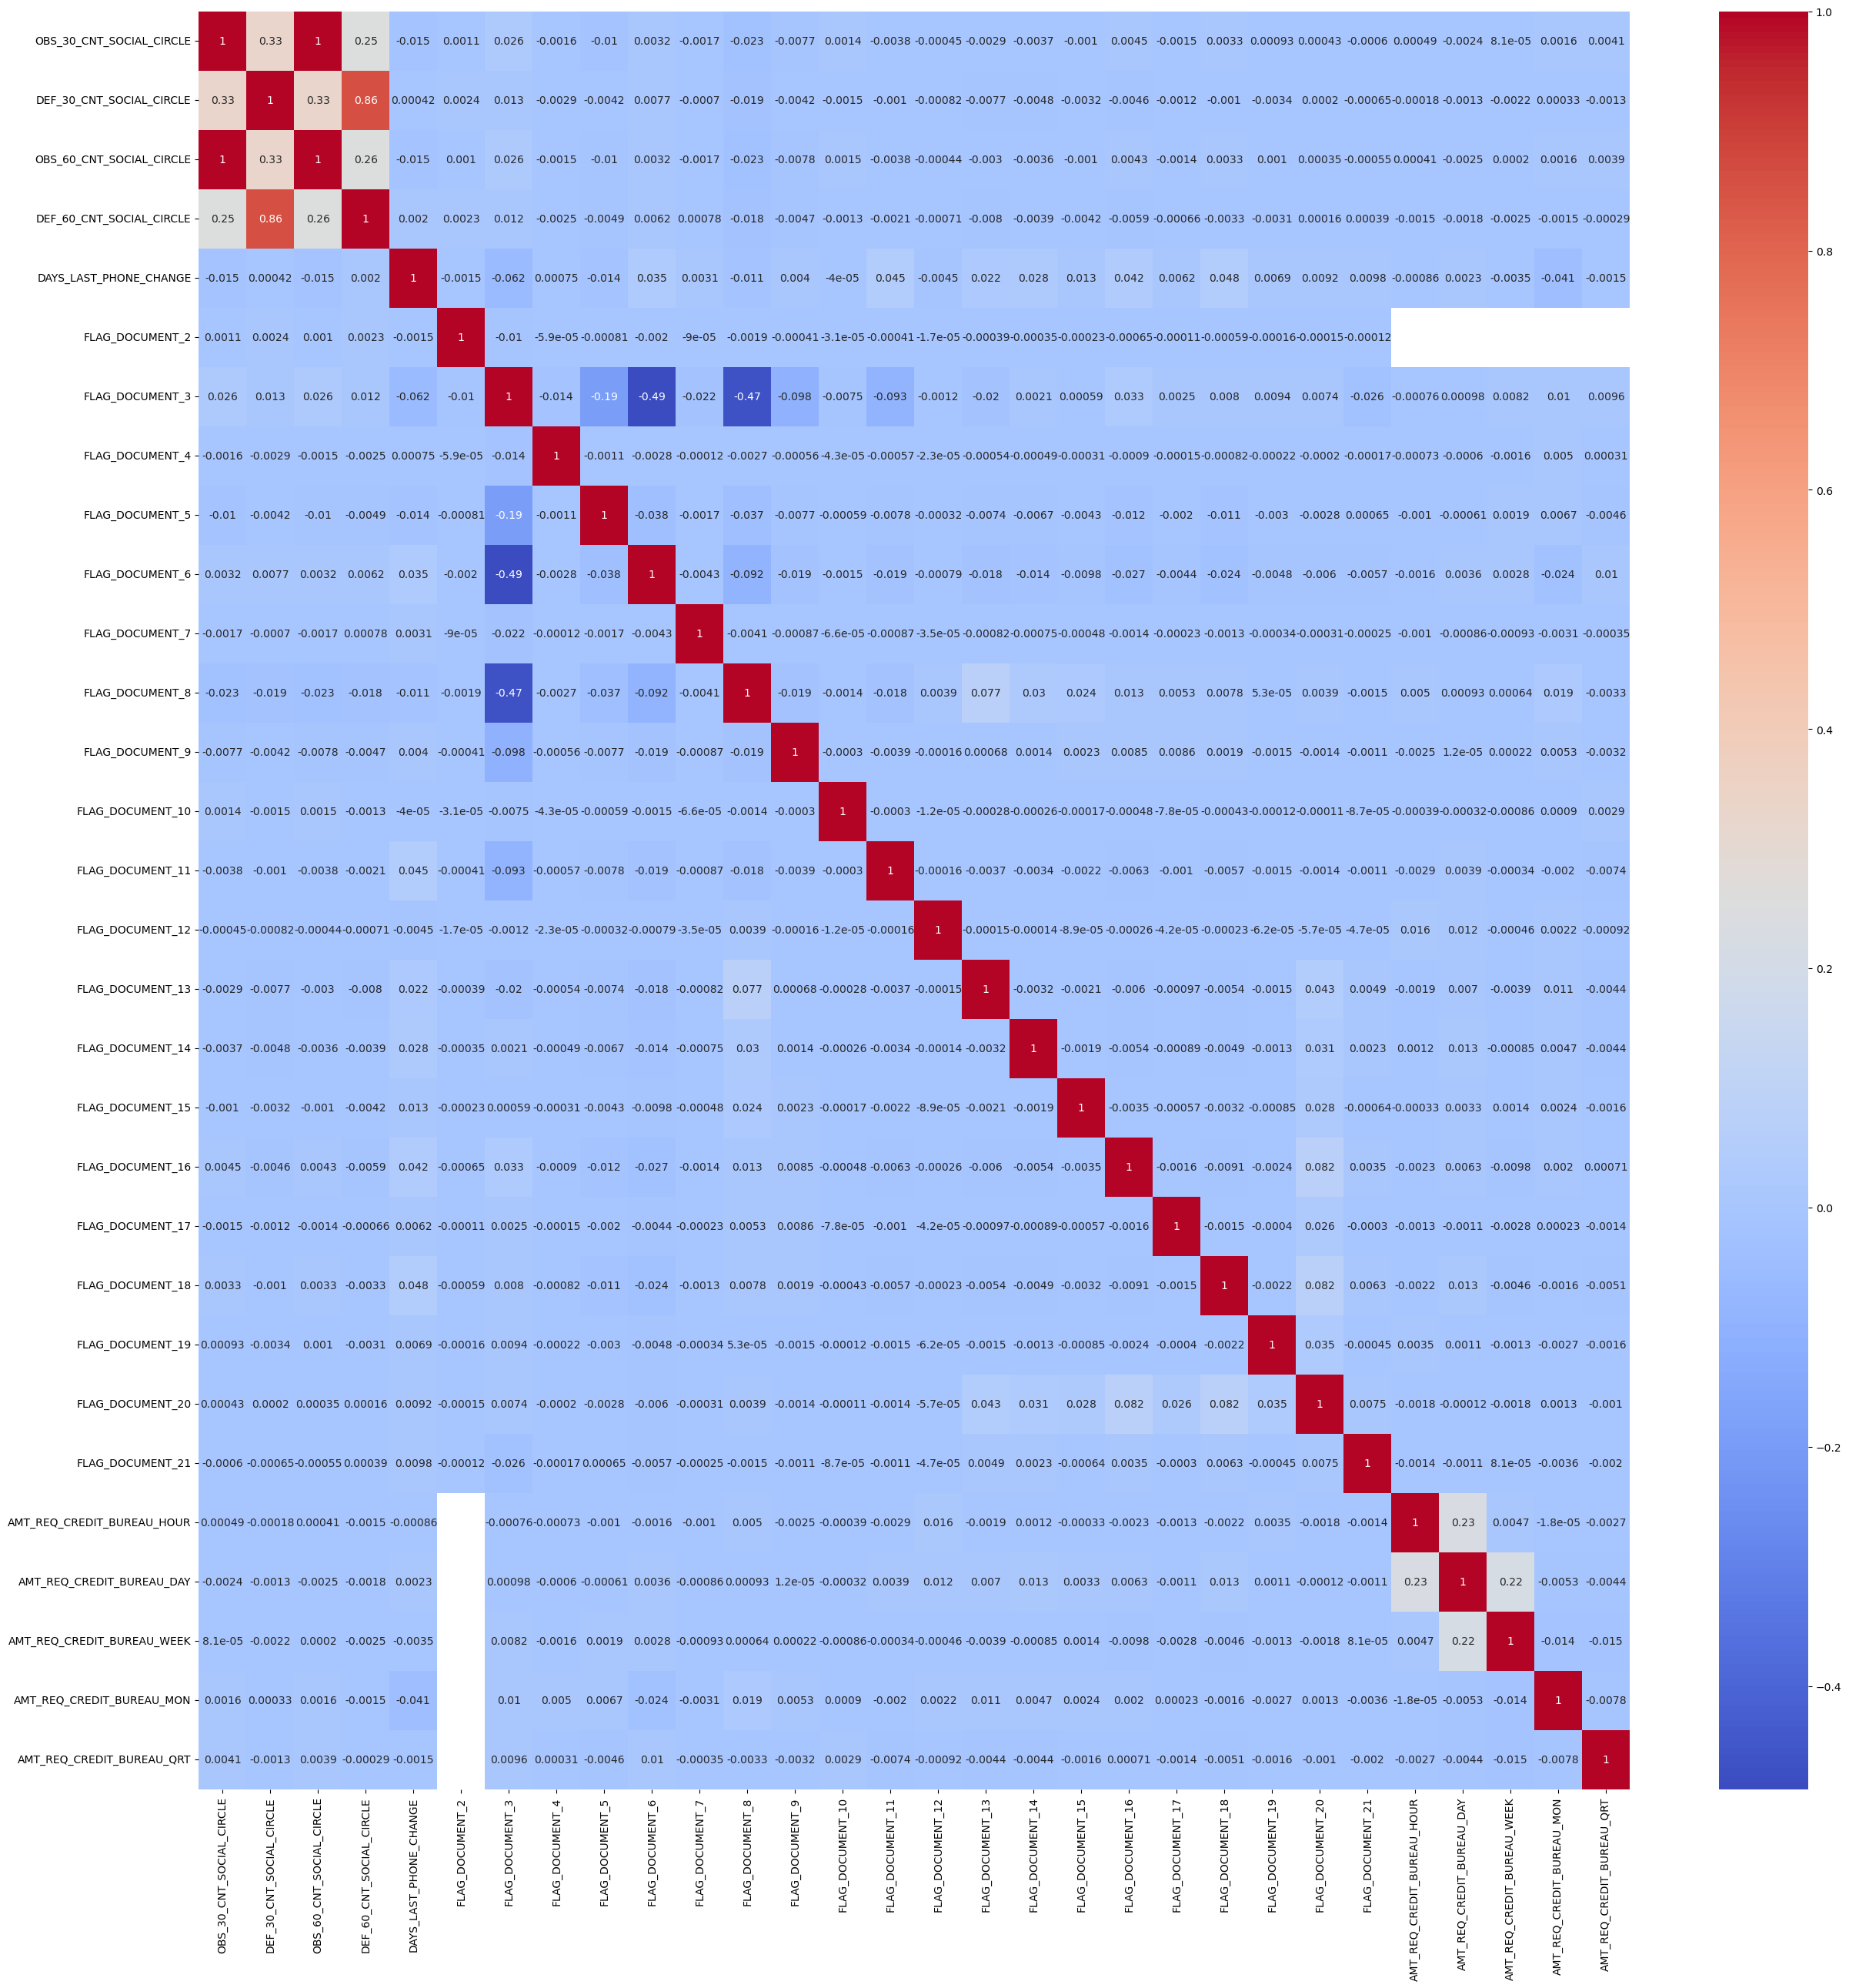

In [8]:
plt.figure(figsize = (30,30))
sns.heatmap(application_data.iloc[:,90:121].corr(method = 'pearson'),cmap = 'coolwarm',annot = True)
plt.show()

In [9]:
columns = application_data.columns.to_list()

In [10]:
Numerical_Columns = application_data.select_dtypes(include = [float,int])

In [11]:
columns_imp = []
for i in Numerical_Columns:
    print(i,application_data[i].corr(application_data['TARGET'],method = 'pearson'))
    if application_data[i].corr(application_data['TARGET'],method = 'pearson') >0.5 and application_data[i].corr(application_data['TARGET'],method = 'pearson')<-0.5:
        columns_imp.append(i)
        

SK_ID_CURR -0.002108469018197723
TARGET 1.0
CNT_CHILDREN 0.01918713359627005
AMT_INCOME_TOTAL -0.003981865601205666
AMT_CREDIT -0.030369286461429768
AMT_ANNUITY -0.012816561515413596
AMT_GOODS_PRICE -0.03964528116954426
REGION_POPULATION_RELATIVE -0.037227148542445354
DAYS_BIRTH 0.07823930830982712
DAYS_EMPLOYED -0.044931662657738784
DAYS_REGISTRATION 0.0419748628314172
DAYS_ID_PUBLISH 0.05145717260705751
OWN_CAR_AGE 0.03761156427516556
FLAG_MOBIL 0.0005343955790282348
FLAG_EMP_PHONE 0.0459822197165926
FLAG_WORK_PHONE 0.028524322363217617
FLAG_CONT_MOBILE 0.0003701268023489059
FLAG_PHONE -0.023806272330357297
FLAG_EMAIL -0.0017583834312546156
CNT_FAM_MEMBERS 0.009307784396531136
REGION_RATING_CLIENT 0.05889901494571248
REGION_RATING_CLIENT_W_CITY 0.060892667564823706
HOUR_APPR_PROCESS_START -0.024165831430094438
REG_REGION_NOT_LIVE_REGION 0.00557594452090834
REG_REGION_NOT_WORK_REGION 0.006941907545371692
LIVE_REGION_NOT_WORK_REGION 0.0028194791841589946
REG_CITY_NOT_LIVE_CITY 0.044395

In [12]:
columns_imp

[]

## So Target column could not be best positive or negative realtionship with all variables.
## So we can proceed to find all Variables correletion

In [ ]:
columns_imp = []
for i in Numerical_Columns:
    for j in Numerical_Columns:
        if i!=j:
            #print(i,':',j,application_data[i].corr(application_data[j],method = 'pearson')
            if application_data[i].corr(application_data[j],method = 'pearson') >0.5 or application_data[i].corr(application_data['TARGET'],method = 'pearson')<-0.5:
                columns_imp.append(i)

In [ ]:
columns_imp = set(columns_imp)

In [ ]:
columns_imp.add('TARGET')
columns_imp.add('SK_ID_CURR')

In [ ]:
Categorical_Columns = application_data.select_dtypes(exclude = [float,int])

In [ ]:
Numerical_Columns

In [ ]:
Categorical_Columns

In [ ]:
Total_Columns = list(columns_imp)+list(Categorical_Columns)

In [ ]:
New_Application_data = application_data[Total_Columns]

## Exploratory Data Analysis Starts

## Descriptive Statistics

In [ ]:
New_Application_data.info()

In [ ]:
New_Application_data.describe()

In [ ]:
for i in Categorical_Columns:
    New_Application_data[i].map(str)
    

In [ ]:
a =(New_Application_data.isna().sum()/len(New_Application_data))*100
a.reset_index()
a[0:30]

In [ ]:
a[30:72]

In [ ]:
more_missing_values_columns = a[a > 50].index.tolist()

In [ ]:
print(more_missing_values_columns)
print(len(more_missing_values_columns))

In [ ]:
more_than_50_Numerical = []
for i in Numerical_Columns:
    if i in more_missing_values_columns:more_than_50_Numerical.append(i)     

In [ ]:
for i in more_than_50_Numerical:
    # Perform Mean imputation
    New_Application_data[i].fillna(New_Application_data[i].mean(),inplace = True)

In [ ]:
more_than_50_Categorical = []
for i in Categorical_Columns:
    if i in more_missing_values_columns:more_than_50_Categorical.append(i)

In [ ]:
for i in more_than_50_Categorical:
    # Perform mode imputation
    New_Application_data[i].fillna(New_Application_data[i].mode(),inplace = True)


In [ ]:
a = (New_Application_data.isna().sum() / len(New_Application_data)) * 100
ten_50_missing = a[(a < 50) & (a < 10)].index.tolist()

In [ ]:
ten_50_missing_Numerical = []
for i in ten_50_missing:
    if i in Numerical_Columns:
        ten_50_missing_Numerical.append(i)

In [ ]:
ten_50_missing_Categorical = []
for i in ten_50_missing:
    if i in Categorical_Columns:
        ten_50_missing_Categorical.append(i)

In [ ]:
imputer = KNNImputer(n_neighbors=2)

for i in ten_50_missing_Numerical:
    # Perform KNN imputation
    New_Application_data[i] = imputer.fit_transform(New_Application_data[[i]])


In [ ]:
for i in ten_50_missing_Categorical:
    # Perform mode imputation
    New_Application_data[i].fillna(New_Application_data[i].mode(),inplace = True)


In [ ]:
ten_missing_values_column = a[a<10].index.tolist()

In [ ]:
a = (New_Application_data.isna().sum() / len(New_Application_data)) * 100

In [ ]:
New_Application_data.isna().sum().sum()

In [ ]:
columns = New_Application_data.columns

for i in ten_missing_values_column:
    for i in columns:
        New_Application_data.dropna(subset = [i],inplace = True)
        
 It takes lot of time so i drop all rows remaining 10% columns
        

In [ ]:
New_Application_data.dropna(axis = 0,inplace = True)

### Here I use More than 50% Data I use I use Mean  or Median Imputations
### Here I use 10%-50% Data I use K-Nearest Neighbour technique to fill missing Values
### for Categorical Data I use Mode Technique
### lessthan 10% Data I use drop that na values.
### if drop na's then i loss total data.

## why Iam using Mean for More than 50% columns. Because If I use KNN It takes lot of Time
## Why Iam Using KNN imputation for 10-50%. Because If i use mean for that it will effected by outliers. so I use KNN for that
## mode imputation is more effective for categorical columns.

## Here Nearly 39 columns is missing values The Analysis Should not be Perfect. Because More than 50% data is missing

In [ ]:
Numerical_Columns =New_Application_data.select_dtypes(include = [float,int])
Numerical_Columns = Numerical_Columns.columns

In [ ]:
def Descriptive_Analysis():
    for i in Numerical_Columns:
        median = np.median(New_Application_data[i])
        mean = np.mean(New_Application_data[i])
        standard_deviation =np.std(New_Application_data[i])
        variance = np.var(New_Application_data[i])
        skewness = sp.stats.skew(New_Application_data[i])
        kurtosis = sp.stats.kurtosis(New_Application_data[i])
        print('central tendency')
        print('median of',i,'=',median)
        print('mean of',i,'=',mean,'\n')
        print("Dispersion")
        print('variance of',i,'=',variance)
        print('Standard Deviation of',i,'=',standard_deviation,'\n')
        print('Skewness')
        print('skewness of',i,'=',skewness,'\n')
        print('kurtosis')
        print('kurtosis of',i,'=',kurtosis,'\n')

In [ ]:
Descriptive_Analysis()

# Same Steps applied for Previous application Data

In [ ]:
previous_application_data.info()

In [ ]:
previous_application_data.describe()

In [ ]:
b = (previous_application_data.isna().sum() / len(previous_application_data)) * 100
ten_50_missing = b[(b < 50) & (b < 10)].index.tolist()

In [ ]:
more_missing_values_columns = b[b > 50].index.tolist()

In [ ]:
Categorical_Columns = previous_application_data.select_dtypes(exclude = [float,int])
Categorical_Columns=Categorical_Columns.columns

In [ ]:
Numerical_Columns = previous_application_data.select_dtypes(include = [float,int])
Numerical_Columns=Numerical_Columns.columns

In [ ]:
more_than_50_Categorical = []
for i in Categorical_Columns:
    if i in more_missing_values_columns:more_than_50_Categorical.append(i)
for i in more_than_50_Categorical:
    # Perform mode imputation
    previous_application_data[i].fillna(previous_application_data[i].mode(),inplace = True)

more_than_50_Numerical = []
for i in Numerical_Columns:
    if i in more_missing_values_columns:more_than_50_Numerical.append(i)     
for i in more_than_50_Numerical:
    # Perform Mean imputation
    previous_application_data[i].fillna(previous_application_data[i].mean(),inplace = True)

In [ ]:
ten_50_missing_Numerical = []
for i in ten_50_missing:
    if i in Numerical_Columns:
        ten_50_missing_Numerical.append(i)
ten_50_missing_Categorical = []
for i in ten_50_missing:
    if i in Categorical_Columns:
        ten_50_missing_Categorical.append(i)

In [ ]:
imputer = KNNImputer(n_neighbors=2)

for i in ten_50_missing_Numerical:
    # Perform KNN imputation
    previous_application_data[i] = imputer.fit_transform(previous_application_data[[i]])


In [ ]:
for i in ten_50_missing_Categorical:
    # Perform mode imputation
    previous_application_data[i].fillna(previous_application_data[i].mode(),inplace = True)


In [ ]:
previous_application_data.dropna(axis = 0,inplace = True)

In [ ]:
def Descriptive_Analysis():
    for i in previous_application_data.select_dtypes(include = (float,int)):
        median = np.median(previous_application_data[i])
        mean = np.mean(previous_application_data[i])
        standard_deviation =np.std(previous_application_data[i])
        variance = np.var(previous_application_data[i])
        skewness = sp.stats.skew(previous_application_data[i])
        kurtosis = sp.stats.kurtosis(previous_application_data[i])
        print('central tendency')
        print('median of',i,'=',median)
        print('mean of',i,'=',mean,'\n')
        print("Dispersion")
        print('variance of',i,'=',variance)
        print('Standard Deviation of',i,'=',standard_deviation,'\n')
        print('Skewness')
        print('skewness of',i,'=',skewness,'\n')
        print('kurtosis')
        print('kurtosis of',i,'=',kurtosis,'\n')

In [ ]:
Descriptive_Analysis()

# Step-2 Finding Outliers

In [ ]:
boxplot_columns = New_Application_data.select_dtypes(include = [float,int])
boxplot_columns = boxplot_columns.columns
for i in boxplot_columns :
    sns.boxplot(x = New_Application_data[i])
    plt.show()

#### Here I am Showing outliers of Each Parameter. Why Iam Considering this as Outliers Here Data Points Should lie in Less than (25%-(75%-25%)*1.5) or greater than (75%+(75%-25%)*1.5). So I consider that points as outliers.

In [ ]:
boxplot_columns = previous_application_data.select_dtypes(include = [float,int])
boxplot_columns = boxplot_columns.columns
for i in boxplot_columns :
    sns.boxplot(x = previous_application_data[i])
    plt.show()

In [ ]:
columns = list(New_Application_data.select_dtypes(include = [float,int]).columns)
New_Application_data.describe()
for i in columns:
    Q1=New_Application_data.describe().loc["25%",i]
    Q3=New_Application_data.describe().loc["75%",i]
    IQR=Q3-Q1
    print(i,New_Application_data.loc[New_Application_data[i]<(Q1-IQR*1.5),i].count())
    c = (Q1-IQR*1.5)
    print(i,New_Application_data.loc[New_Application_data[i]>(Q3+IQR*1.5),i].count())
    b = (Q3+IQR*1.5)

## This is outliers count of New_Application Data

In [ ]:
columns = list(previous_application_data.select_dtypes(include = [float,int]).columns)
previous_application_data.describe()
for i in columns:
    Q1=previous_application_data.describe().loc["25%",i]
    Q3=previous_application_data.describe().loc["75%",i]
    IQR=Q3-Q1
    print(i,previous_application_data.loc[previous_application_data[i]<(Q1-IQR*1.5),i].count())
    c = (Q1-IQR*1.5)
    print(i,previous_application_data.loc[previous_application_data[i]>(Q3+IQR*1.5),i].count())
    b = (Q3+IQR*1.5)

## This is outliers count of Previous_Application Data

## Step-3 find data imbalance in New_application_data

In [ ]:
data_aggregation = New_Application_data.groupby('TARGET').agg(rows = ('TARGET','size')).reset_index()

In [ ]:
data_aggregation

In [ ]:
sns.barplot(x = 'TARGET',y = 'rows', data =data_aggregation )
plt.show()

In [ ]:
imbalance =(data_aggregation['rows'][0]/(data_aggregation['rows'][1]+data_aggregation['rows'][0]))*100

In [ ]:
imbalance

In [ ]:
imbalance1 =(data_aggregation['rows'][1]/(data_aggregation['rows'][0]+data_aggregation['rows'][1]))*100

In [ ]:
imbalance1

In [ ]:
for i in New_Application_data.select_dtypes(exclude = [float,int]).columns:
    data_imbalance = New_Application_data.groupby(i)['TARGET'].count().reset_index()
    sns.barplot(x =i ,y = 'TARGET',data = data_imbalance)
    plt.show()

In [ ]:
for i in New_Application_data.select_dtypes(exclude = [float,int]).columns:
    data_aggregation = New_Application_data.groupby(i).agg(rows = ('TARGET','size')).reset_index()
    imbalance =(data_aggregation['rows'][0]/(data_aggregation['rows'][1]+data_aggregation['rows'][0]))*100
    imbalance1 =(data_aggregation['rows'][1]/(data_aggregation['rows'][0]+data_aggregation['rows'][1]))*100
    print('Column_Name:',i,'Parameter:',data_aggregation[i][0],'is','No Difficulty in paying',str(imbalance)+'%')
    print('Column_Name:',i,'Parameter:',data_aggregation[i][1],'is','getting late and facing difficulty',str(imbalance1)+"%")

In [ ]:
data_aggregation = New_Application_data.groupby('TARGET')[i].count().reset_index()

In [ ]:
New_Application_data.columns

### According to Each Parametet it is Imbalanced Data Above result shows each %
### Target 0 Customers is 92.43% is there in Total Data  
### Target 1 Customers is 7.57% is there in Total Data.
### Less Customers are facing Difficulty yo pay or getting alte to Pay

## Previous Data

In [ ]:
previous_application_data.columns

In [ ]:
New_Data_Taget = New_Application_data[["SK_ID_CURR",'TARGET']]

In [ ]:
previous_application_data.shape

In [ ]:
previous_application_data = pd.merge(previous_application_data,New_Data_Taget, on ="SK_ID_CURR",how = 'left' )

In [ ]:
previous_application_data.shape

In [ ]:
columns = set(previous_application_data.select_dtypes(exclude = [float,int]).columns)-set(['FLAG_LAST_APPL_PER_CONTRACT','NAME_CONTRACT_STATUS'])

In [ ]:
previous_application_data.select_dtypes(exclude = [float,int]).columns

In [ ]:
for i in columns:
    data_aggregation = previous_application_data.groupby(i).agg(rows = ('TARGET','size')).reset_index()
    imbalance =(data_aggregation['rows'][0]/(data_aggregation['rows'][1]+data_aggregation['rows'][0]))*100
    imbalance1 =(data_aggregation['rows'][1]/(data_aggregation['rows'][0]+data_aggregation['rows'][1]))*100
    print('Column_Name:',i,'Parameter:',data_aggregation[i][0],'is','No Difficulty in paying',str(imbalance)+'%')
    print('Column_Name:',i,'Parameter:',data_aggregation[i][1],'is','getting late and facing difficulty',str(imbalance1)+"%")

In [ ]:
data_aggregation = previous_application_data.groupby('TARGET').agg(rows = ('TARGET','size')).reset_index()
imbalance =(data_aggregation['rows'][0]/(data_aggregation['rows'][1]+data_aggregation['rows'][0]))*100
imbalance1 =(data_aggregation['rows'][1]/(data_aggregation['rows'][1]+data_aggregation['rows'][0]))*100

In [ ]:
print('Target 0 :',imbalance)
print('Target 1 :',imbalance1)
data_aggregation

In [ ]:
for i in previous_application_data.select_dtypes(exclude = [float,int]).columns:
    data_imbalance = previous_application_data.groupby(i)['TARGET'].count().reset_index()
    plt.figure(figsize = (20,20))
    sns.barplot(x =i ,y = 'TARGET',data = data_imbalance)
    plt.show()

### According to Each Parametet it is Imbalanced Data Above result shows each %
### Target 0 Customers is 92.91% is there in Total Data  
### Target 1 Customers is 7.09% is there in Total Data.
### Less Customers are facing Difficulty yo pay or getting late to Pay

## Step-4 Univariate,Segmented Univariate, Bivariate Analysis

### Univariate Analysis

In [ ]:
previous_application_data.drop(['TARGET'],axis = 1,inplace = True)

In [ ]:
Total_Data = pd.merge(New_Application_data,previous_application_data,on = "SK_ID_CURR",how = 'left')

In [ ]:
Total_Data.shape

In [ ]:
x = []
y = []
for i in Total_Data.columns.to_list():
    if i.endswith('_x'):x.append(i)
    if i.endswith('_y'):y.append(i)
        

In [ ]:
x

## Box Plot

In [ ]:
for i in Total_Data.select_dtypes(include = (float,int)).columns:
    sns.boxplot(x = Total_Data[i])
    plt.show()

## Count plot for Categorical Variables

In [ ]:
for i in Total_Data.select_dtypes(exclude = (float,int)).columns:
    plt.figure(figsize = (20,20))
    sns.countplot(x = Total_Data[i])
    plt.show()

## Histogram plot for finding How distribution is present

In [ ]:
for i in Total_Data.select_dtypes(include = (float,int)).columns:
    sns.histplot(x = Total_Data[i],kde = True)
    plt.show()

## Segment Univariate Analysis

In [ ]:
for i in set(Total_Data.columns)-set('TARGET'):
    plt.figure(figsize = (20,20))
    k = sns.FacetGrid(data=Total_Data, col='TARGET')
    k.map(sns.histplot, i)
    plt.show()


## Bivariate Analysis

In [ ]:
for i in set(Total_Data.select_dtypes(include = (float,int)).columns):
    for j in set(Total_Data.select_dtypes(exclude = (float,int)).columns):
        data1 = Total_Data.groupby(j)[i].sum().reset_index()
        plt.figure(figsize = (20,20))
        sns.barplot(x = j,y = i,data =data1 )
        plt.show()

In [ ]:
for i in set(Total_Data.select_dtypes(include = (float,int)).columns)-set('TARGET'):
    for j in set(Total_Data.select_dtypes(include = (float,int)).columns)-set('TARGET'):
        if i != j:
            sns.scatterplot(x = i,y = j,hue = 'TARGET',data =Total_Data)
            plt.show()

## Step-5 - Finding Top 5 Correlation with Target Variable

In [ ]:
Top_Variables = []
Top_Values = []
for i in set(Total_Data.select_dtypes(include = (float,int)).columns)-set('TARGET'):
    print(i,Total_Data[i].corr(Total_Data['TARGET'],method = 'pearson'))
    Top_Variables.append(i)
    Top_Values.append(Total_Data[i].corr(Total_Data['TARGET'],method = 'pearson'))
        

In [ ]:
my_dict = dict(zip(Top_Variables,Top_Values))
sorted_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1], reverse=True)}


In [ ]:
sorted_dict

In [ ]:
Target = []
for i in Total_Data['TARGET']:
    if i ==0:Target.append('Other Issues')
    elif i ==1:Target.append('Getting Late facing difficulty to Pay')
    else:
        pass

In [ ]:
Total_Data['Target']=Target

In [ ]:
Top_Variables = []
Top_Values = []
for i in set(Total_Data.select_dtypes(exclude = (float,int)).columns)-set('Target'):
    cross_tab = pd.crosstab(Total_Data[i], Total_Data['Target'])
    chi2, p, dof, expected = sp.stats.chi2_contingency(cross_tab)
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    Top_Variables.append(i)
    Top_Values.append(p)
        

In [ ]:
my_dict = dict(zip(Top_Variables,Top_Values))
sorted_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1], reverse=False)}

In [ ]:
sorted_dict

## 'DAYS_EMPLOYED': 0.06255529645782781,
## 'REGION_RATING_CLIENT_W_CITY': 0.0570937743407961,
## 'DAYS_BIRTH': 0.056079021810455314,
## 'REGION_RATING_CLIENT': 0.05282116598569049,
## 'DEF_30_CNT_SOCIAL_CIRCLE': 0.03589010452930863
## 'TARGET': 0.9999999999999998   are Top correlation with Target in continuous Variables
## 'OCCUPATION_TYPE': 1.790107042069559e-145,
## 'NAME_EDUCATION_TYPE': 1.520662575604912e-105,
## 'ORGANIZATION_TYPE': 7.434113652948711e-73,
## 'NAME_INCOME_TYPE': 5.602593981942963e-55,
##  'PRODUCT_COMBINATION': 4.756432303023019e-50    are Top correlation with Target in Categorical Variables


In [ ]:
Top_Variables = []
Top_Values = []
for i in set(Total_Data.select_dtypes(exclude = (float,int)).columns):
    for j in set(Total_Data.select_dtypes(exclude = (float,int)).columns):
        if i!=j:
            cross_tab = pd.crosstab(Total_Data[i], Total_Data['Target'])
            chi2, p, dof, expected = sp.stats.chi2_contingency(cross_tab)
            print("Chi-square statistic:", chi2)
            print("p-value:", p)
            Top_Variables.append(i+'with'+j)
            Top_Values.append(p)
        

In [ ]:
Top_Variables

In [ ]:
my_dict = dict(zip(Top_Variables,Top_Values))
sorted_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1], reverse=False)}

In [ ]:
sorted_dict

In [ ]:
Total_Data['NAME_FAMILY_STATUS'].unique()

## 'OCCUPATION_TYPE with NAME_HOUSING_TYPE'
## 'OCCUPATION_TYPE  with NAME_FAMILY_STATUS'
## 'OCCUPATION_TYPE with NAME_INCOME_TYPE'
## 'NAME_EDUCATION_TYPEwithORGANIZATION_TYPE'   are the top correlations with each other in categorical